# Objective of the Case: 
Simple Problem- Predict the price of Flights. Study the different variables, analyze the case, use alogorithms to predict the price of flight ticket as accurately as possible.

# # #Begin with importing the basic Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import math

In [2]:
dataset = pd.read_csv("laptop_price.csv")

In [3]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
dataset = dataset.drop("Unnamed: 0",axis = 1)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [6]:
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
dataset.shape

(1303, 11)

In [8]:
dataset.duplicated().sum()

29

# Pre-Processing

# Step1: Null Value Analysis

In [9]:
dataset.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [10]:
# No Null Value to Show

# This particular case has lot of long String based variables, which requires extensive feature engineering in order to draw some meaningful insights

# Pre-Processing Step-2

In [11]:
# Lets convert RAM into a Numerical Feature
dataset["Ram"] = dataset["Ram"].str.replace("GB","")

In [12]:
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [13]:
# Like RAM convert weight into Numerical Feature
dataset["Weight"] = dataset["Weight"].str.replace("kg","")

In [14]:
# From the screenresolution variable lets see if we have Touch screen and IPS availablle:Yes or No.
# We will do the price comparison as well in EDA

In [15]:
dataset["Touchscreen"] = dataset["ScreenResolution"].apply(lambda x:1 if "TouchScreen" in x else 0 )

In [16]:
dataset["IPS"] = dataset["ScreenResolution"].apply(lambda x: 1 if "IPS" in x else 0)

In [17]:
dataset["X_res"] = dataset["ScreenResolution"].str.split("x",expand = True)[1]

In [18]:
dataset["A_res"] = dataset["ScreenResolution"].str.split("x",expand = True)[0]

In [19]:
dataset["A_res"]= dataset["A_res"].str.replace(",","").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [20]:
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,A_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080,1920
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,1800,2880
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1600,2560


In [21]:
dataset["A_res"] = dataset["A_res"].astype("int32")

In [22]:
dataset["X_res"] = dataset["X_res"].astype("int32")

In [23]:
# Lets take out PPI-Pixel Per Inch and another important feature to determine price

In [24]:
dataset["PPI"] = (((dataset["A_res"]**2) + (dataset["X_res"]**2))**.5/dataset["Inches"]).round(decimals=0).astype("float")

In [25]:
# Now we have extratcted enough information from Screen Resolution lets' drop the column

In [26]:
dataset= dataset.drop(["ScreenResolution"],axis =1)

In [27]:
#Identify the Brands of CPU

In [28]:
dataset["CPU"] = dataset["Cpu"].apply(lambda x: " ".join(x.split()[0:3]))

In [29]:
# While it is know case that processors will be of intel or AMD, we want to see if they are in i series, or AMD or any other.
# We will write a function to check that

In [30]:
def CPU(Processors):
    if Processors == "Intel Core i3" or Processors == "Intel Core i5" or Processors =="Intel Core i7":
        return Processors
    if Processors.split()[0] =="Intel":
        return "Other Intel Processor"
    else:
        return "AMD Processor"

In [31]:
dataset["CPU Brand"] = dataset["CPU"].apply(CPU)

In [32]:
# Drop the Feature
dataset = dataset.drop(["Cpu","CPU"], axis =1)

In [33]:
dataset["GPU"] = dataset["Gpu"].apply(lambda x:" ".join((x.split()[0:1])))

In [34]:
dataset = dataset.drop(["Gpu"],axis =1)

In [35]:
dataset["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [36]:
def OPS(text):
    if text.split(" ")[0] == "Windows":
        return "Windows"
    if text == "macOS" or text =="Mac OS X":
        return "Mac"
    if text =="Linux":
        return "Linux"
    else:
        return "Other"

In [37]:
dataset["OpSys"]= dataset["OpSys"].apply(OPS)

In [38]:
dataset.head()

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,X_res,A_res,PPI,CPU Brand,GPU
0,Apple,Ultrabook,13.3,8,128GB SSD,Mac,1.37,71378.6832,0,1,1600,2560,227.0,Intel Core i5,Intel
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Mac,1.34,47895.5232,0,0,900,1440,128.0,Intel Core i5,Intel
2,HP,Notebook,15.6,8,256GB SSD,Other,1.86,30636.0000,0,0,1080,1920,141.0,Intel Core i5,Intel
3,Apple,Ultrabook,15.4,16,512GB SSD,Mac,1.83,135195.3360,0,1,1800,2880,221.0,Intel Core i7,AMD
4,Apple,Ultrabook,13.3,8,256GB SSD,Mac,1.37,96095.8080,0,1,1600,2560,227.0,Intel Core i5,Intel


In [39]:
# For Memory finding a complicated task is required which is shown below

In [40]:
dataset['Memory'] = dataset['Memory'].astype(str).replace('\.0', '', regex=True)
dataset["Memory"] = dataset["Memory"].str.replace('GB', '')
dataset["Memory"] = dataset["Memory"].str.replace('TB', '000')
new = dataset["Memory"].str.split("+", n = 1, expand = True)

dataset["first"]= new[0]
dataset["first"]=dataset["first"].str.strip()

dataset["second"]= new[1]

dataset["Layer1HDD"] = dataset["first"].apply(lambda x: 1 if "HDD" in x else 0)
dataset["Layer1SSD"] = dataset["first"].apply(lambda x: 1 if "SSD" in x else 0)
dataset["Layer1Hybrid"] = dataset["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
dataset["Layer1Flash_Storage"] = dataset["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

dataset['first'] = dataset['first'].str.replace(r'\D', '')

dataset["second"].fillna("0", inplace = True)

dataset["Layer2HDD"] = dataset["second"].apply(lambda x: 1 if "HDD" in x else 0)
dataset["Layer2SSD"] = dataset["second"].apply(lambda x: 1 if "SSD" in x else 0)
dataset["Layer2Hybrid"] = dataset["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
dataset["Layer2Flash_Storage"] = dataset["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

dataset['second'] = dataset['second'].str.replace(r'\D', '')

dataset["first"] = dataset["first"].astype(int)
dataset["second"] = dataset["second"].astype(int)

dataset["HDD"]=(dataset["first"]*dataset["Layer1HDD"]+dataset["second"]*dataset["Layer2HDD"])
dataset["SSD"]=(dataset["first"]*dataset["Layer1SSD"]+dataset["second"]*dataset["Layer2SSD"])
dataset["Hybrid"]=(dataset["first"]*dataset["Layer1Hybrid"]+dataset["second"]*dataset["Layer2Hybrid"])
dataset["Flash_Storage"]=(dataset["first"]*dataset["Layer1Flash_Storage"]+dataset["second"]*dataset["Layer2Flash_Storage"])

dataset.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [41]:
dataset.head()

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,X_res,A_res,PPI,CPU Brand,GPU,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,128 SSD,Mac,1.37,71378.6832,0,1,1600,2560,227.0,Intel Core i5,Intel,0,128,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Mac,1.34,47895.5232,0,0,900,1440,128.0,Intel Core i5,Intel,0,0,0,128
2,HP,Notebook,15.6,8,256 SSD,Other,1.86,30636.0000,0,0,1080,1920,141.0,Intel Core i5,Intel,0,256,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,Mac,1.83,135195.3360,0,1,1800,2880,221.0,Intel Core i7,AMD,0,512,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Mac,1.37,96095.8080,0,1,1600,2560,227.0,Intel Core i5,Intel,0,256,0,0


In [42]:
dataset = dataset.drop(["Memory","Flash_Storage"], axis =1)

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Ram          1303 non-null   object 
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   object 
 6   Price        1303 non-null   float64
 7   Touchscreen  1303 non-null   int64  
 8   IPS          1303 non-null   int64  
 9   X_res        1303 non-null   int32  
 10  A_res        1303 non-null   int32  
 11  PPI          1303 non-null   float64
 12  CPU Brand    1303 non-null   object 
 13  GPU          1303 non-null   object 
 14  HDD          1303 non-null   int64  
 15  SSD          1303 non-null   int64  
 16  Hybrid       1303 non-null   int64  
dtypes: float64(3), int32(2), int64(5), object(7)
memory usage: 163.0+ KB


In [44]:
# Convert the numerical form object variable to int/float.

In [45]:
dataset["Ram"] = dataset["Ram"].astype("int32")

In [46]:
dataset["Weight"] = dataset["Weight"].astype("float")

In [47]:
dataset = dataset.drop(["Inches","X_res","A_res"],axis=1)

# Done with feature engineering and extraction which has been a little complicated task here.

# Pre-Processing Step-3: Outlier Identification

In [48]:
#Lets begin with statistical Analysis

In [49]:
dataset.describe()

,Ram,Weight,Price,Touchscreen,IPS,PPI,HDD,SSD,Hybrid
count,1303.000000,1303.000000,1303.000000,1303.0,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,8.382195,2.038734,59870.042910,0.0,0.280123,146.442057,413.783576,183.732924,8.831926
std,5.084665,0.665475,37243.201786,0.0,0.449231,43.197999,515.818779,186.966903,92.567185
min,2.000000,0.690000,9270.720000,0.0,0.000000,91.000000,0.000000,0.000000,0.000000
25%,4.000000,1.500000,31914.720000,0.0,0.000000,127.000000,0.000000,0.000000,0.000000
50%,8.000000,2.040000,52054.560000,0.0,0.000000,141.000000,0.000000,256.000000,0.000000
75%,8.000000,2.300000,79274.246400,0.0,1.000000,157.000000,1000.000000,256.000000,0.000000
max,64.000000,4.700000,324954.720000,0.0,1.000000,352.000000,2000.000000,1024.000000,1000.000000


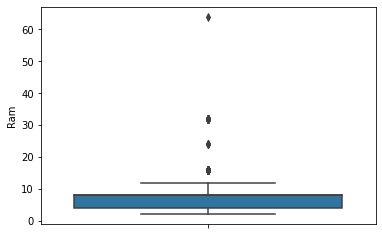

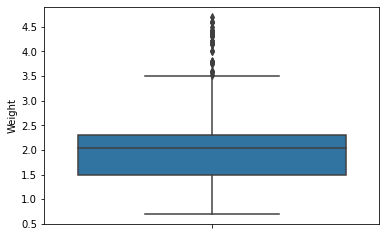

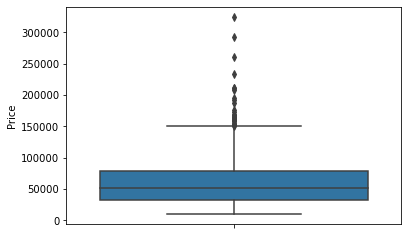

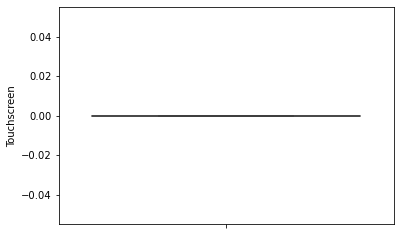

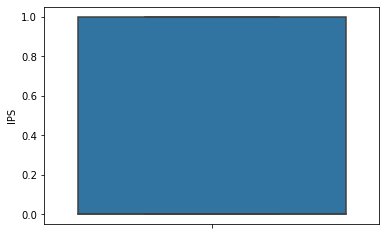

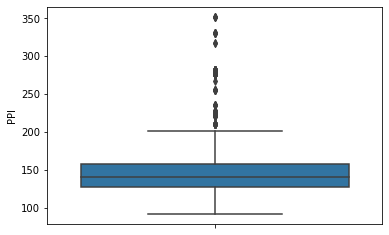

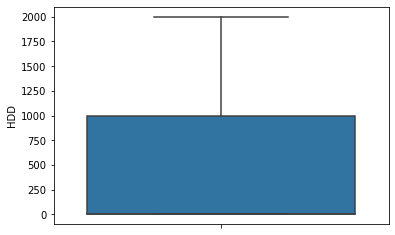

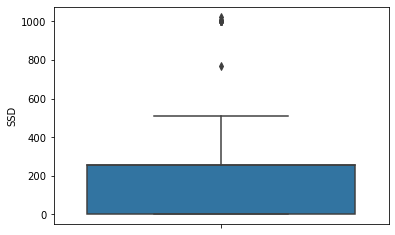

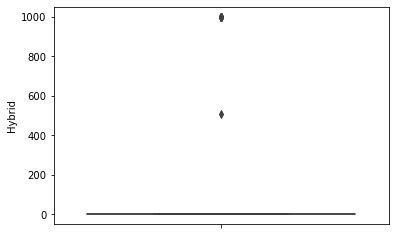

In [50]:
for i in dataset.columns:
    if dataset[i].dtype != "O":
        sns.boxplot(y = i,data = dataset)
        plt.show()

In [51]:
#Not Treating Outlier as it doesnt look like there any major outliers

# EDA

In [52]:
Numerical_Features=[feature for feature in dataset.columns if dataset[feature].dtype !="O"]

In [53]:
Categorical_Features=[feature for feature in dataset.columns if dataset[feature].dtype =="O"]

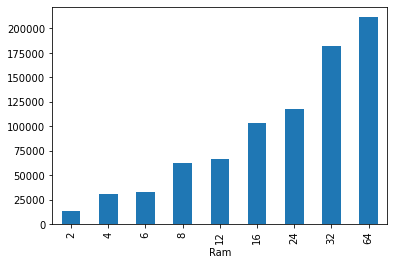

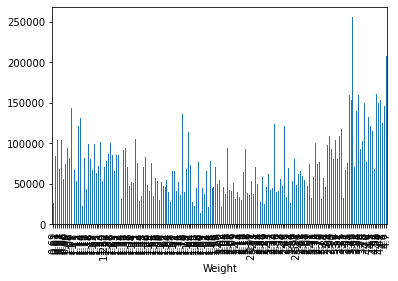

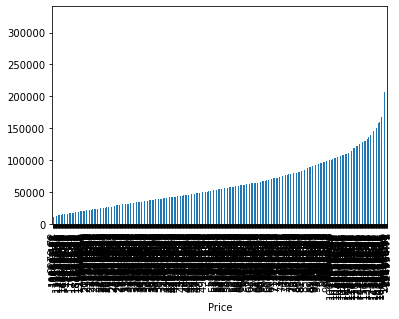

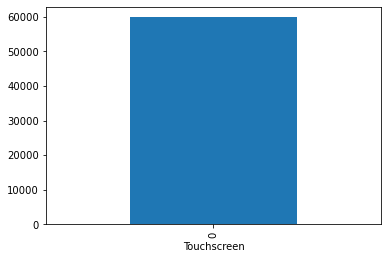

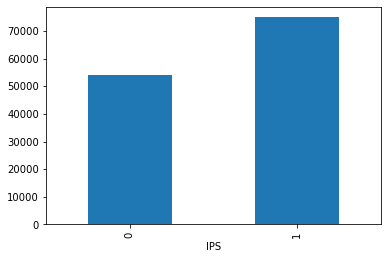

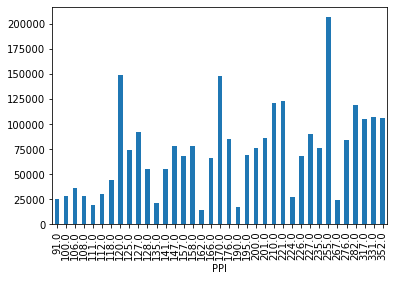

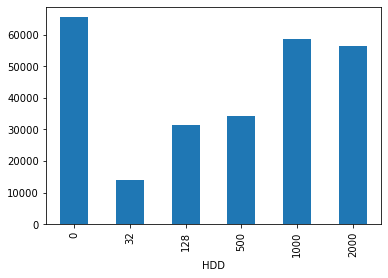

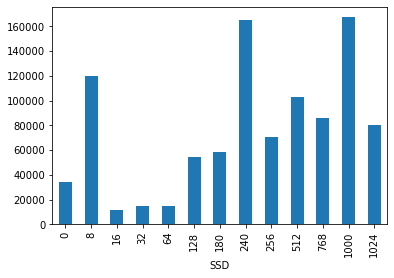

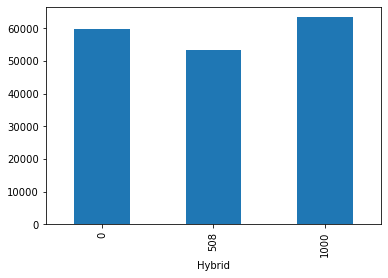

In [54]:
for feature in Numerical_Features:
        dataset.groupby(feature)["Price"].mean().plot(kind = "bar")
        plt.show()

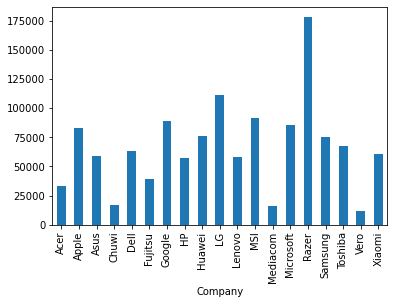

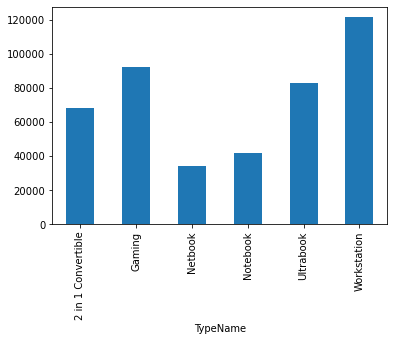

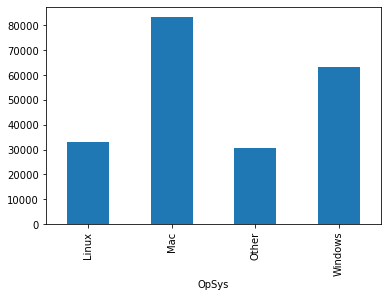

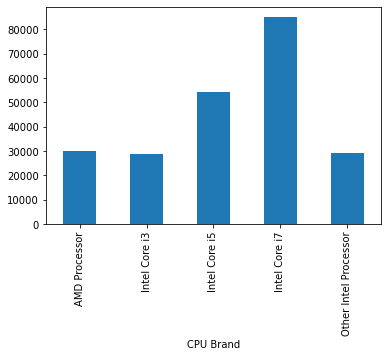

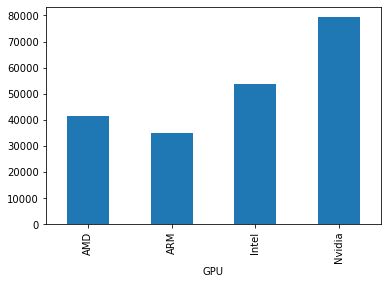

In [55]:
for feature in Categorical_Features:
        dataset.groupby(feature)["Price"].mean().plot(kind = "bar")
        plt.show()

<AxesSubplot:xlabel='Ram', ylabel='Price'>

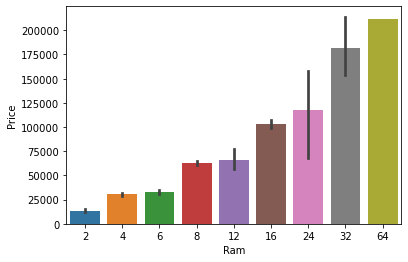

In [56]:
sns.barplot(x = dataset["Ram"],y = dataset["Price"])

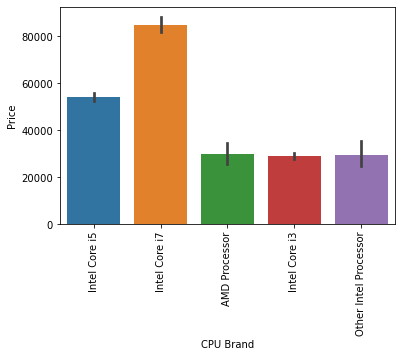

In [57]:
sns.barplot(x = dataset["CPU Brand"], y = dataset["Price"])
plt.xticks(rotation = 'vertical')
plt.show()

<AxesSubplot:xlabel='OpSys', ylabel='Price'>

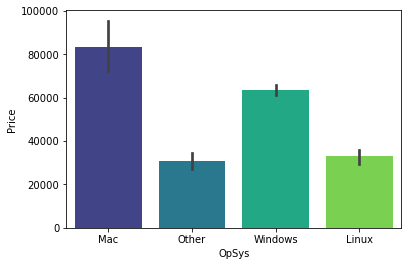

In [58]:
sns.barplot(x=dataset["OpSys"], y ="Price",data= dataset, palette = "viridis", saturation = 4)

<AxesSubplot:xlabel='OpSys', ylabel='Price'>

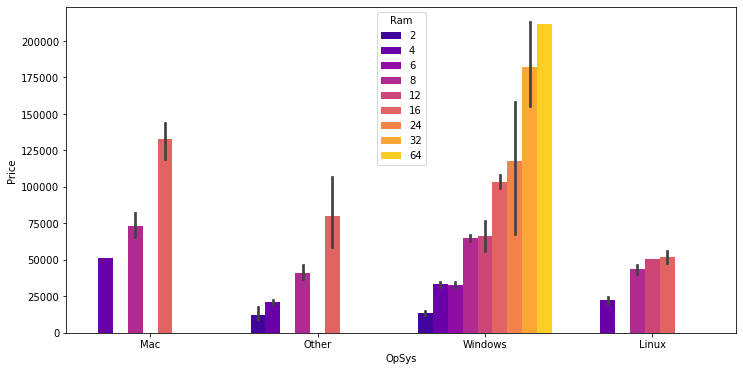

In [59]:
plt.figure(figsize =(12,6))
sns.barplot(x=dataset["OpSys"], y ="Price", hue = "Ram", data= dataset, palette = "plasma", saturation = 4)

In [60]:
# Windows laptop with 64GB and 32GB Ram are most expensive

<AxesSubplot:xlabel='OpSys', ylabel='Price'>

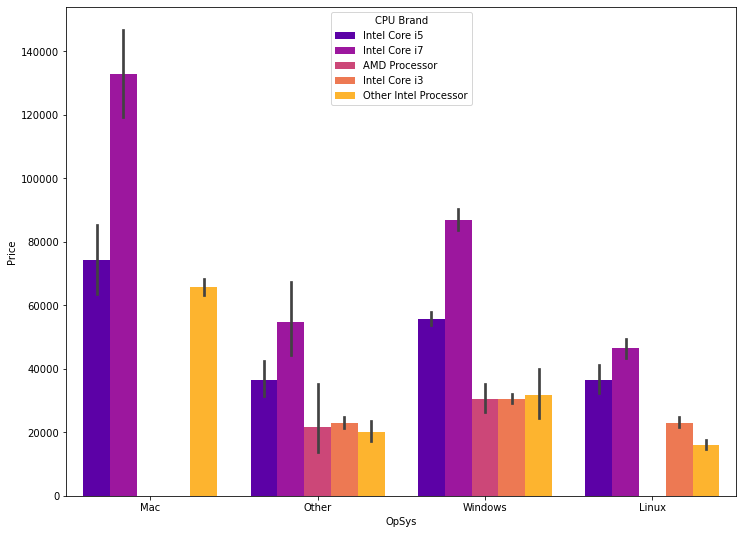

In [61]:
plt.figure(figsize = (12,9))
sns.barplot(x=dataset["OpSys"], y ="Price", hue = "CPU Brand", data= dataset, palette = "plasma", saturation = 4)

In [62]:
# As expected intel core i7 are most expensive, mac with core i7 tops the table

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

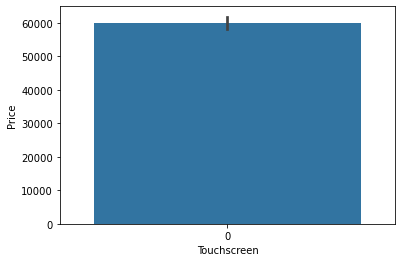

In [63]:
sns.barplot(x = dataset["Touchscreen"], y = dataset["Price"])

<AxesSubplot:xlabel='IPS', ylabel='Price'>

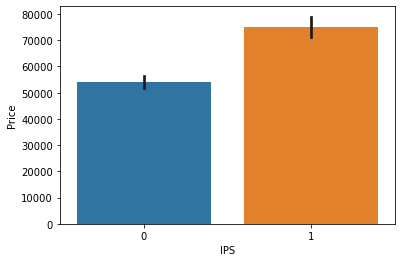

In [64]:
sns.barplot(x=dataset["IPS"], y = dataset["Price"],  errcolor='.1')

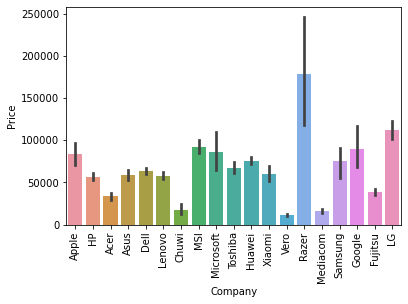

In [65]:
sns.barplot(x=dataset["Company"],y = dataset["Price"])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

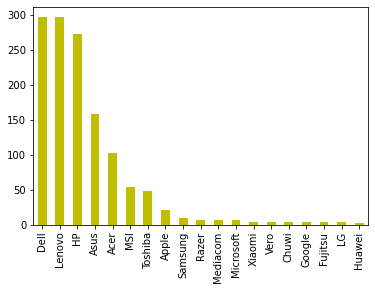

In [66]:
dataset["Company"].value_counts().plot(kind = "bar", color = "y")

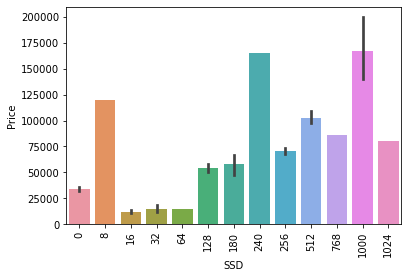

In [67]:
sns.barplot(x=dataset["SSD"],y = dataset["Price"])
plt.xticks(rotation='vertical')
plt.show()

In [68]:
dataset.corr()["Price"].sort_values(ascending = False)

Price          1.000000
Ram            0.743007
SSD            0.670799
PPI            0.473579
IPS            0.252208
Weight         0.210370
Hybrid         0.007989
HDD           -0.096441
Touchscreen         NaN
Name: Price, dtype: float64

<AxesSubplot:xlabel='Hybrid', ylabel='Price'>

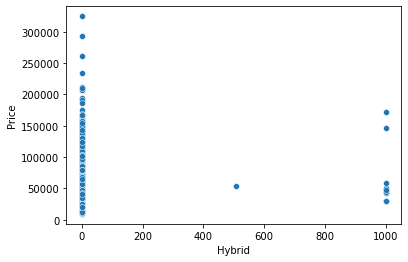

In [69]:
sns.scatterplot(x= dataset["Hybrid"], y = dataset["Price"])

<AxesSubplot:xlabel='HDD', ylabel='Price'>

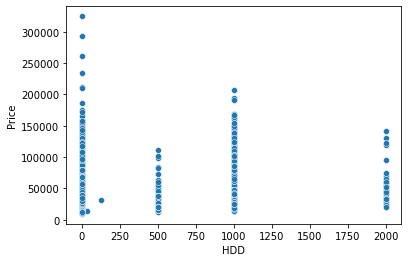

In [70]:
sns.scatterplot(x= dataset["HDD"], y = dataset["Price"])

In [71]:
dataset = dataset.drop(["HDD","Hybrid"], axis =1)

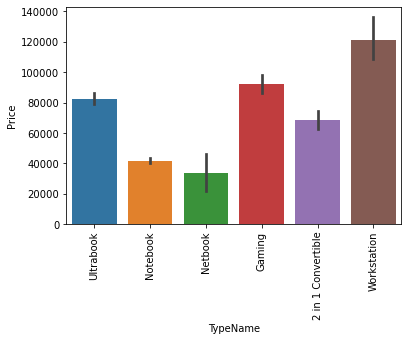

In [72]:
sns.barplot(x=dataset["TypeName"],y = dataset["Price"])
plt.xticks(rotation = "vertical")
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

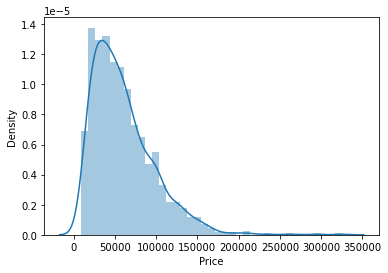

In [73]:
sns.distplot(dataset["Price"])

<AxesSubplot:xlabel='Price', ylabel='Density'>

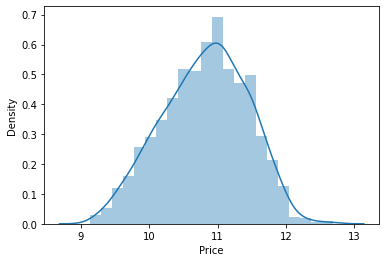

In [74]:
sns.distplot(np.log(dataset["Price"]))

# Spliting the Dataset into X and Y

In [75]:
x = dataset.drop(["Price"], axis =1)
y = np.log(dataset["Price"])

In [128]:
x_train.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,CPU Brand,GPU,SSD
290,Acer,Notebook,2,Other,2.19,0,0,100.0,Other Intel Processor,Intel,16
757,HP,Workstation,8,Windows,2.59,0,0,141.0,Intel Core i7,Nvidia,256
762,Google,Ultrabook,8,Other,1.10,0,0,235.0,Intel Core i5,Intel,256
121,MSI,Gaming,16,Windows,1.80,0,0,141.0,Intel Core i7,Nvidia,256
532,Asus,Notebook,8,Windows,2.00,0,1,282.0,Intel Core i7,Nvidia,256


# Splitting Into Train and Test

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.75,random_state = 101)

# Model Applications

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [78]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Model-1: Linear Regression 

In [79]:
x["OpSys"].value_counts()

Windows    1125
Other        95
Linux        62
Mac          21
Name: OpSys, dtype: int64

In [80]:
step1 = ColumnTransformer(transformers = [("col_trf", OneHotEncoder(sparse = False, drop ="first", handle_unknown= 'ignore'),[0,1,3,8,9])],remainder='passthrough')
step2= LinearRegression()
pipe= Pipeline([("step1",step1),
              ('step2',step2)])
pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)
print("R2 Score", r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8097037464314847
MAE 0.20889837163315414


In [81]:
step1 = ColumnTransformer(transformers = [("col_trf", OneHotEncoder(sparse = False, drop ="first", handle_unknown= 'ignore'),[0,1,3,8,9])],remainder='passthrough')
step2= Ridge(alpha =10)
pipe= Pipeline([("step1",step1),
              ('step2',step2)])
pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)
print("R2 Score", r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))



R2 Score 0.8011489030973376
MAE 0.2132344074692681


# Model 2: Lasso

In [82]:
step1 = ColumnTransformer(transformers = [("col_trf", OneHotEncoder(sparse = False, drop ="first", handle_unknown= 'ignore'),[0,1,3,8,9])],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8027908342815803
MAE 0.2123097214601891


# Model 3: Ridge

In [83]:
step1 = ColumnTransformer(transformers = [("col_trf", OneHotEncoder(sparse = False, drop ="first", handle_unknown= 'ignore'),[0,1,3,8,9])],remainder='passthrough')


step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7848291966261163
MAE 0.20916583924893567


# Model 4: Random Forest 

In [94]:
x.head(1)

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,CPU Brand,GPU,SSD
0,Apple,Ultrabook,8,Mac,1.37,0,1,227.0,Intel Core i5,Intel,128


In [99]:
step1 = ColumnTransformer(transformers = [("col_trf", OneHotEncoder(sparse = False, drop ="first", handle_unknown= 'ignore'),[0,1,3,8,9])],remainder='passthrough')


step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe_rf = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_rf.fit(x_train,y_train)

y_pred = pipe_rf.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.856596256981377
MAE 0.17187454577538647


In [119]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first', handle_unknown= 'ignore'),[0,1,3,8,9])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe_rf1= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_rf1.fit(x_train,y_train)

y_pred = pipe_rf1.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.856596256981377
MAE 0.17187454577538647


# Model 5: AdaBoost

In [85]:
step1 = ColumnTransformer(transformers = [("col_trf", OneHotEncoder(sparse = False, drop ="first", handle_unknown= 'ignore'),[0,1,3,8,9])],remainder='passthrough')


step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7692474537704567
MAE 0.2330551786078758


# Model 6: XGBoost

In [86]:
step1 = ColumnTransformer(transformers = [("col_trf", OneHotEncoder(sparse = False, drop ="first", handle_unknown= 'ignore'),[0,1,3,8,9])],remainder='passthrough')

step2 =XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8669264194727674
MAE 0.1689417644616612


# Model 7: Voting and Stacking Regressor

In [87]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers = [("col_trf", OneHotEncoder(sparse = False, drop ="first", handle_unknown= 'ignore'),[0,1,3,8,9])],remainder='passthrough')



rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=None,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8665057855733186
MAE 0.1665954354188394


In [88]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers = [("col_trf", OneHotEncoder(sparse = False, drop ="first", handle_unknown= 'ignore'),[0,1,3,8,9])],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8563878000643064
MAE 0.17861778772774003


# Exporting the Model

In [123]:
import pickle
#pickle.dump(dataset,open('dataset.pkl',"wb"))
pickle.dump(pipe_rf1,open('pipe_a.pkl',"wb"))

In [124]:
model = pickle.load(open('pipe_a.pkl',"rb"))

In [127]:
model

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 3, 8, 9])])),
                ('step2',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       max_samples=0.5, random_state=3))])

In [126]:
x_test

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS,PPI,CPU Brand,GPU,SSD
765,Acer,Notebook,4,Windows,1.60,0,0,118.0,Intel Core i5,Intel,128
1054,Dell,Ultrabook,16,Windows,1.20,0,0,276.0,Intel Core i7,Intel,1000
230,Asus,Notebook,4,Windows,2.37,0,0,100.0,Intel Core i3,Intel,0
1090,Dell,Notebook,4,Linux,2.20,0,0,100.0,Other Intel Processor,Intel,0
20,Asus,Netbook,2,Windows,0.98,0,0,135.0,Other Intel Processor,Intel,0
...,...,...,...,...,...,...,...,...,...,...,...
269,Lenovo,Notebook,8,Windows,2.05,0,0,141.0,Intel Core i7,Intel,256
375,HP,Notebook,4,Windows,1.91,0,0,141.0,AMD Processor,AMD,256
754,Asus,Notebook,4,Windows,2.37,0,0,100.0,Intel Core i7,Intel,256
37,Dell,Notebook,8,Windows,2.80,0,1,127.0,Intel Core i5,AMD,128


In [125]:
model.predict(x_test)

array([10.7920484 , 11.75176971, 10.07853901,  9.720346  ,  9.51186254,
       11.31916849, 10.4026996 ,  9.85083551, 10.70112715, 10.71343362,
       11.21050314, 10.72629615, 10.83803409, 11.08787835, 11.64744897,
        9.66933024, 11.62615289, 11.00886293, 10.76928148, 11.06411868,
       11.29523858, 10.88444386, 10.34190864, 11.51360931, 10.00309973,
       11.18119608, 11.65299278, 11.25292647, 11.51617663, 10.50353635,
        9.85986971, 10.55594887,  9.68238849,  9.50383346, 11.49426905,
        9.81759211, 11.13698172, 10.08146399, 10.86357773, 11.504579  ,
       11.36726008, 10.4762637 , 11.11900152, 10.41939304, 11.30927539,
       10.79493417, 10.98143358, 11.0625593 , 11.1313457 , 11.35991359,
       11.10066682, 10.73135414, 10.86909574, 11.06919225,  9.9878859 ,
       11.37293131,  9.62787164, 10.53479264, 10.92828953, 11.12791918,
       10.12649277,  9.93377185, 11.38802977, 10.98770517, 11.10369396,
       10.67555755, 10.52140179, 11.16476542, 10.70532948, 10.30

In [101]:
dataset.head(1)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,GPU,SSD
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,227.0,Intel Core i5,Intel,128


In [102]:
dataset["CPU Brand"].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Other Intel Processor'], dtype=object)

In [103]:
query = np.array(["Apple", 4, "Intel Core 5"])

In [104]:
query


array(['Apple', '4', 'Intel Core 5'], dtype='<U12')